# Сжатие изображения без потери качества при помощи PCA

In [3]:
!pip install opencv-python
   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy.stats import stats
from sklearn.decomposition import PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01


Загрузим картинку и нарисуем ее в монохромный формат

In [13]:
# %%capture
# !wget -O flower.png "https://www.dropbox.com/s/xoos0myk285efyu/flower.png?dl=0"
import requests

def download_file(url, filename):
    response = requests.get(url)
    response.raise_for_status()  # Проверка на наличие ошибок
    with open(filename, 'wb') as file:
        file.write(response.content)

# Загрузим файл
download_file("https://www.dropbox.com/s/xoos0myk285efyu/flower.png?dl=1", "flower.png")

   
   

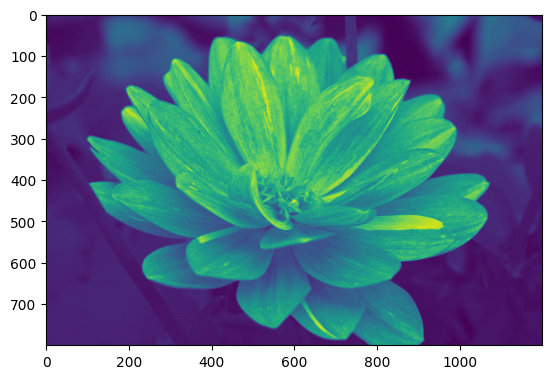

In [39]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

## Вопрос для Quiz

Какого размера картинка img? В ответе запишите общее число пикселей.

In [15]:
img.shape

(800, 1200)

Посмотрим на матрицу изображения

In [40]:
img

array([[16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       ...,
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10]], dtype=uint8)

### Сейчас будем делать PCA

**Задание.** Масштабируйте данные, поделив значения в матрице на 255

In [71]:
img_new = img / 255


**Задание.** Обучите PCA с 50-ю компонентами. Снизьте размерность.

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
img_new = pca.fit_transform(img_new)

## Вопрос для Quiz

Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами. Ответ округлите до сотых.

In [63]:

print( np.sum(pca.explained_variance_ratio_))


0.9854889753132433


**Задание.** Нарисуйте график, на котором отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

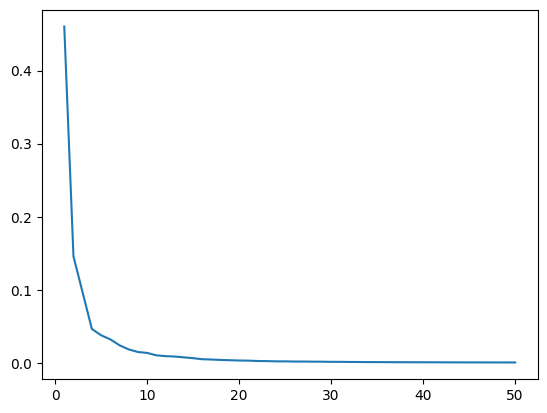

In [64]:
plt.plot(np.arange(1, 51, 1), pca.explained_variance_ratio_)

### Восстанавливаем изображение

**Задание.** Восстановите изображение, используя pca.inverse_transform.

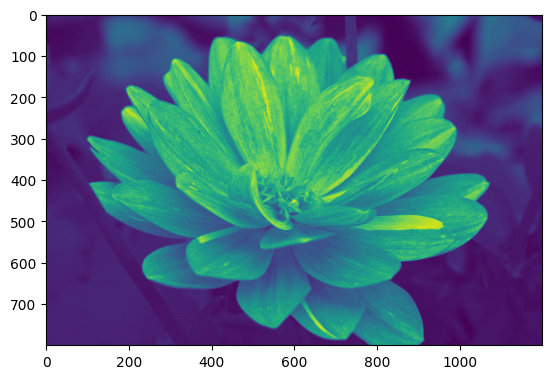

In [77]:

# img_new = pca.inverse_transform(img_new)
# img_reconstructed = img_new.reshape(800, 1200)
# plt.imshow(img_reconstructed)
# plt.figure(figsize=(12,8))
# plt.imshow(img_new)
plt.imshow(img)


**Задание.** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам).

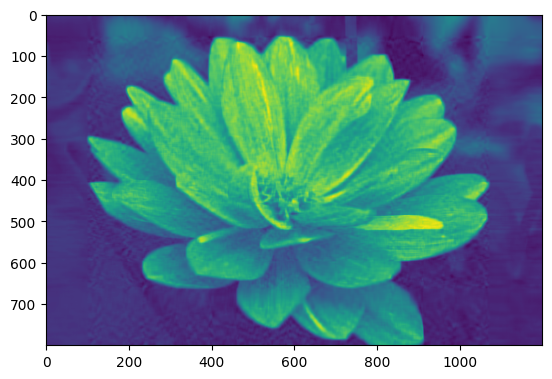

In [76]:
plt.imshow(img_new)

## Вопрос для Quiz

Упало ли визуально качество при сжатии изображения до 50 главных компонент?

## Вопрос для Quiz

Подберите минимальное количество компонент, при которых сжатое изображение визуально практически не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

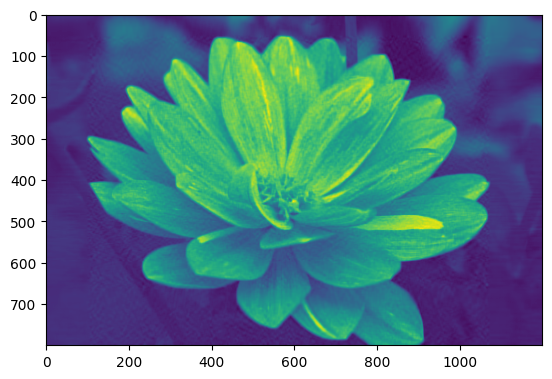

In [88]:
from sklearn.decomposition import PCA
for i in range(74, 76):
    img_new = img / 255
    pca = PCA(n_components=i)
    img_new = pca.fit_transform(img_new)
    img_new = pca.inverse_transform(img_new)
    plt.imshow(img_new)
    

## Бонус

Попробуйте проделать все действия ноутбука, но уже с цветным изображением.

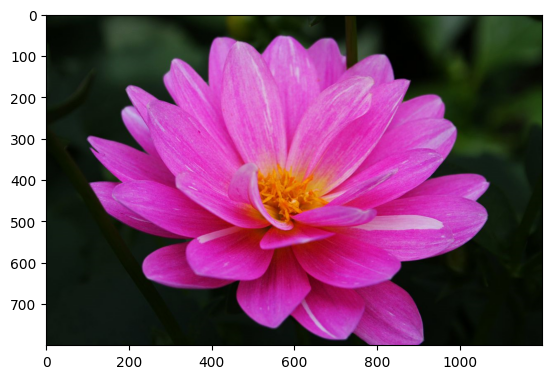

In [ ]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Отличия от предыдущих шагов заключаются в том, что цветное RGB-изображение состоит из трех каналов - это матрица яркостей красного, матрица яркостей зеленого и матрица яркостей синего цветов.

Номер канала - последняя размерность в объекте `img`.
Например, матрица яркости красного - это `img[:,:,0]`.

Все действия выше нужно проделать с каждым каналом в отдельности, а потом объединить преобразованные изображения для каждого канала - чтобы получить итоговую картинку со сниженной размерностью.

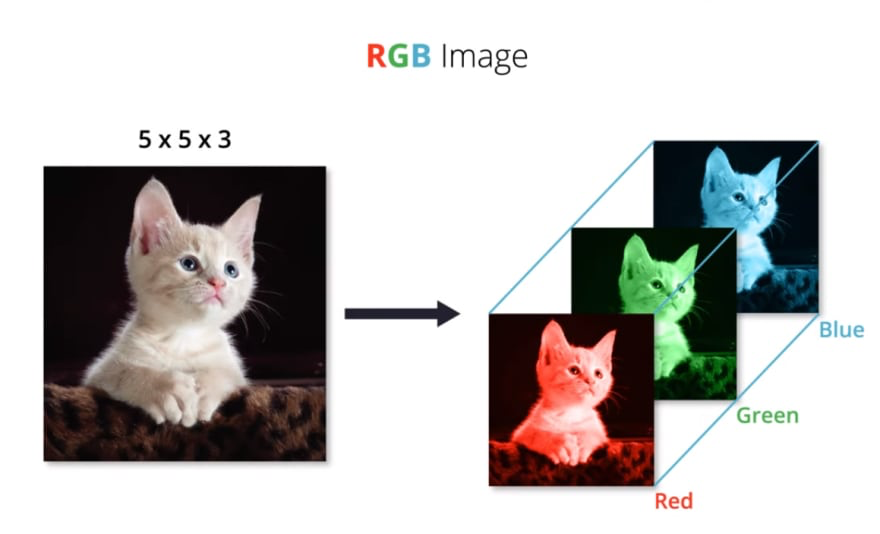

In [ ]:
# ваш код здесь

## Вопрос для Quiz

Найдите любое цветное изображение, которое вам нравится и снизьте его размерность, подберите минимальное число компонент, чтобы визуально не терять качество.

Вы можете снижать размерность для монохромного или для цветного изображения.

Результат - исходное изображение + его размеры, а также изображение после снижения размерности + число компонент.

In [90]:

image = cv2.cvtColor(cv2.imread('/home/fltww/Изображения/Обои/ColorWall-o57k5m.png'), cv2.COLOR_BGR2GRAY)

(1440, 2560)

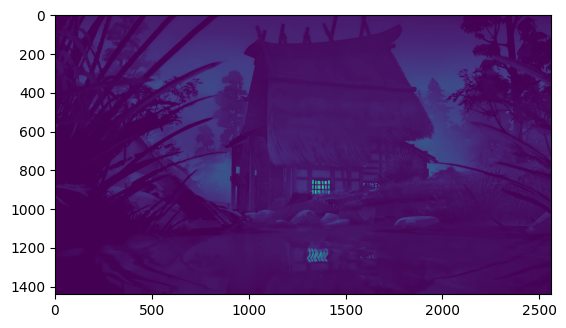

In [93]:
plt.imshow(image)
image.shape

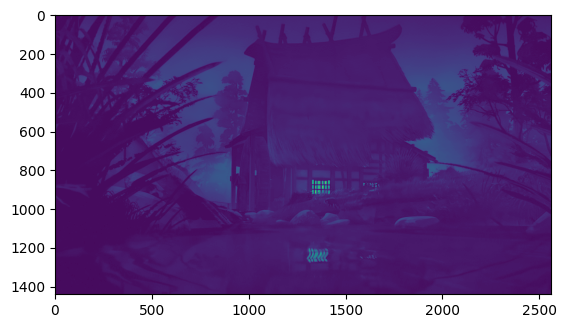

In [103]:
from sklearn.decomposition import PCA
for i in range(250, 252):
    img_new = image / 255
    pca = PCA(n_components=i)
    img_new = pca.fit_transform(img_new)
    img_new = pca.inverse_transform(img_new)
    plt.imshow(img_new)